### Observations about the results of the study. 
Main drugs of interest were: "Capomulin", "Infubinol", "Ketapril", "Placebo"

1. In reviewing "Tumor Response to Treatment" and "Tumor Change Over 45-Day Treatment": Capomulin showed response to treatment, with 19% reduction over 45 days of treatment. Other drugs and placebo group did not show signs of tumor reduction (except Ramicane, see note below).

2. In reviewing "Metastatic Spread During Treatment": Placebo and Ketapril groups had most spread. Capomulin (and Ramicane) had the least spread. 

3. In reviewing "Survival During Treatment": Capomulin had the best results for survival. (Followed by Ramicane, not shown as a part of the assignment, see note below).

NOTE: I also looked at all 10 drugs, and noticed the drug, Ramicane. Ramicane showed response to treatment, with 22% reduction over 45 days of treatment (higher than Capomulin). Ramicane also had less metastatic spread than Capomulin. Ramicane had the second highest survial rate, after Capomulin.

In [15]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
df_clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

df_mouse_drug_data.describe()

# Combine the data into a single dataset
df_complete = pd.merge(df_clinical_trial_data, df_mouse_drug_data, how="left", on=["Mouse ID"])

# Display the data table for preview
df_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [16]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumorvolume = df_complete.groupby(['Drug', 'Timepoint'])["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
df_tumorvolume = pd.DataFrame({"Tumor Volume (mm3)": mean_tumorvolume})
df_tumorvolume = df_tumorvolume.reset_index()

# Preview DataFrame
df_tumorvolume

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [17]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SE_tumorvolume = df_complete.groupby(['Drug', 'Timepoint'])["Tumor Volume (mm3)"].agg(sem)

# Convert to DataFrame
df_tumorvolume_SE = pd.DataFrame({"Tumor Volume (mm3)": SE_tumorvolume})
df_tumorvolume_SE = df_tumorvolume_SE.reset_index()

# Preview DataFrame
df_tumorvolume_SE.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [18]:
# Minor Data Munging to Re-Format the Data Frames
df_pivot_tumorvolume = df_tumorvolume.pivot (index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
df_pivot_tumorvolume_SE = df_tumorvolume_SE.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
# Preview that Reformatting worked
df_pivot_tumorvolume.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


## Plotting - Choose Drugs to Plot

In [19]:
# Pick Drugs
## Drugs of interest
drugs_toplot = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
## Review all drugs
# drugs_toplot = list(df_pivot_tumorvolume.columns)

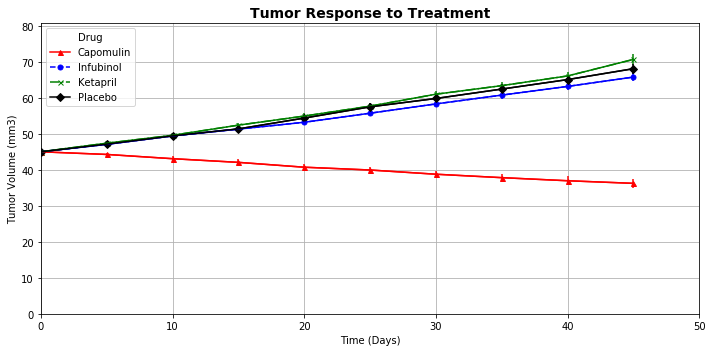

In [20]:
# Generate the Plot (with Error Bars)
# DFs to Plot
df_meandrugs_toplot = df_pivot_tumorvolume.loc[:, drugs_toplot]
df_semdrugs_toplot = df_pivot_tumorvolume_SE.loc[:, drugs_toplot]

#plot
ax = df_meandrugs_toplot.plot(figsize=(10,5), 
                              color=['r', 'b', 'g', 'k', 'c', 'm', 'y', 'purple', 'olive', 'navy'], 
                              yerr = df_semdrugs_toplot, 
                              legend = False)
ax.set_prop_cycle(color=['r', 'b', 'g', 'k', 'c', 'm', 'y', 'purple', 'olive', 'navy'])
df_meandrugs_toplot.plot(figsize=(10,5), 
                         style=['^-', 'o--', 'x-.', 'D-', '<-', 'v--', 'H-.', '>-', '+--', 'h-.'], 
                         markersize=5, ax=ax)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment", fontsize=14, fontweight="bold")
plt.grid(which = 'major', axis = "both")
ax.set_xlim(0, max(df_tumorvolume["Timepoint"])+5)
ax.set_ylim(0, max(df_tumorvolume["Tumor Volume (mm3)"])+10)

# Save the Figure
plt.tight_layout()
plt.savefig("ResponseToTreatment_HY.png")

# Show the chart
plt.show()

## Metastatic Response to Treatment

In [21]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metsite = df_complete.groupby(['Drug', 'Timepoint'])["Metastatic Sites"].mean()

# Convert to DataFrame
df_metsite = pd.DataFrame({"Metastatic Sites": mean_metsite})
df_metsite = df_metsite.reset_index()

# Preview DataFrame
df_metsite.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [22]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SE_metsite = df_complete.groupby(['Drug', 'Timepoint'])["Metastatic Sites"].agg(sem)

# Convert to DataFrame
df_metsite_SE = pd.DataFrame({"Metastatic Sites": SE_metsite})
df_metsite_SE = df_metsite_SE.reset_index()

# Preview DataFrame
df_metsite_SE.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [23]:
# Minor Data Munging to Re-Format the Data Frames
df_pivot_metsite = df_metsite.pivot (index = "Timepoint", columns = "Drug", values = "Metastatic Sites")
df_pivot_metsite_SE = df_metsite_SE.pivot(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")

# Preview that Reformatting worked
df_pivot_metsite.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


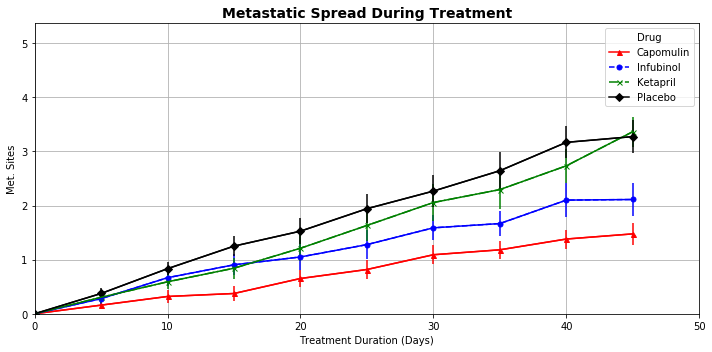

In [24]:
# Generate the Plot (with Error Bars)
# DFs to Plot
df_meanmetsite_toplot = df_pivot_metsite.loc[:, drugs_toplot]
df_semmetsite_toplot = df_pivot_metsite_SE.loc[:, drugs_toplot]

#plot
ax = df_meanmetsite_toplot.plot(figsize=(10,5), 
                                color=['r', 'b', 'g', 'k', 'c', 'm', 'y', 'purple', 'olive', 'navy'], 
                                yerr = df_semmetsite_toplot, 
                                legend = False)
ax.set_prop_cycle( color=['r', 'b', 'g', 'k', 'c', 'm', 'y', 'purple', 'olive', 'navy'])
df_meanmetsite_toplot.plot(figsize=(10,5), 
                           style=['^-', 'o--', 'x-.', 'D-', '<-', 'v--', 'H-.', '>-', '+--', 'h-.'], 
                           markersize=5, ax=ax)
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment", fontsize=14, fontweight="bold")
plt.grid(which = 'major', axis = "both")
ax.set_xlim(0, max(df_metsite["Timepoint"])+5)
ax.set_ylim(0, max(df_metsite["Metastatic Sites"])+2)
# Save the Figure
plt.tight_layout()
plt.savefig("MetastaticSpread_HY.png")

# Show the Figure
plt.show()


## Survival Rates

In [25]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mouse = df_complete.groupby(['Drug', 'Timepoint'])["Mouse ID"].count()

# Convert to DataFrame
df_mousecount = pd.DataFrame({"Mouse Count": count_mouse})
df_mousecount = df_mousecount.reset_index()

# Preview DataFrame
df_mousecount.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [26]:
# Minor Data Munging to Re-Format the Data Frames
df_pivot_mousecount = df_mousecount.pivot (index = "Timepoint", columns = "Drug", values = "Mouse Count")

# Preview the Data Frame
df_pivot_mousecount


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


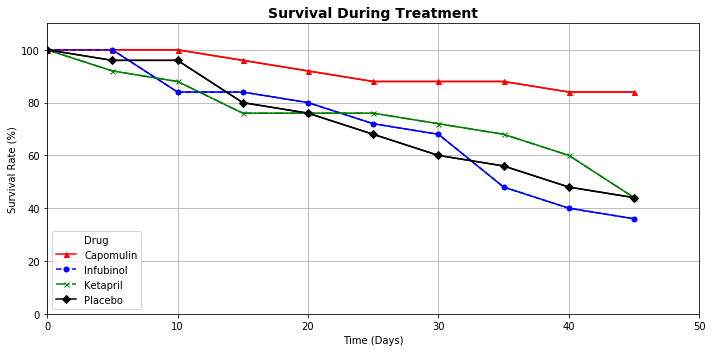

In [27]:
# Generate the Plot (Accounting for percentages)
#DF to Plot
df_pivot_percentmousecount = df_pivot_mousecount
df_pivot_mousecount.iloc[0]
df_pivot_percentmousecount = df_pivot_mousecount.apply(lambda x: (x / df_pivot_mousecount.iloc[0])*100, axis =1)
df_pivot_percentmousecount_toplot = df_pivot_percentmousecount.loc[:, drugs_toplot]

#plot
ax = df_pivot_percentmousecount_toplot.plot(figsize=(10,5), 
                                            color=['r', 'b', 'g', 'k', 'c', 'm', 'y', 'purple', 'olive', 'navy'], 
                                            legend = False)
ax.set_prop_cycle(color=['r', 'b', 'g', 'k', 'c', 'm', 'y', 'purple', 'olive', 'navy'])
df_pivot_percentmousecount_toplot.plot(figsize=(10,5), 
                                       style=['^-', 'o--', 'x-.', 'D-', '<-', 'v--', 'H-.', '>-', '+--', 'h-.'], 
                                       markersize=5, ax=ax)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
plt.title("Survival During Treatment", fontsize=14, fontweight="bold")
plt.grid(which = 'major', axis = "both")
ax.set_xlim(0, max(df_mousecount["Timepoint"])+5)
ax.set_ylim(0, 110)

# Save the Figure
plt.tight_layout()
plt.savefig("Survival_HY.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [28]:
# Calculate the percent changes for each drug
df_summary = df_pivot_tumorvolume.T 
days_max = max(df_complete["Timepoint"])
days_min = min(df_complete["Timepoint"])

df_summary ["percent change"] = ((df_summary[days_max] - df_summary[days_min]) / df_summary[days_min]) *100

# Display the data to confirm
# Store all Relevant Percent Changes into a Tuple
# The following line of code is for following instructions provided, 
# but I'm not using the code for the rest of this exercise.
tup_percent_change = (df_summary ["percent change"])
tup_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: percent change, dtype: float64

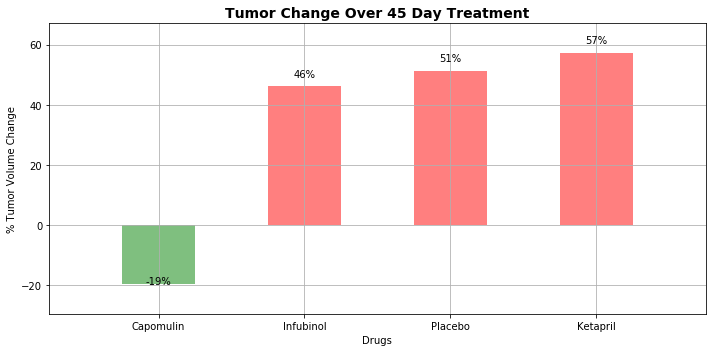

In [29]:
# Splice the data between passing and failing drugs
df_summarydrugs_toplot = df_summary.loc[drugs_toplot, :]
df_summarydrugs_toplot = df_summarydrugs_toplot [["percent change"]]
df_summarydrugs_toplot = df_summarydrugs_toplot.sort_values("percent change")
df_summarydrugs_toplot = df_summarydrugs_toplot.reset_index()

passing_drugs = df_summarydrugs_toplot[df_summarydrugs_toplot["percent change"] < 0]
passing_drugs = passing_drugs.sort_values("percent change")
failing_drugs = df_summarydrugs_toplot[df_summarydrugs_toplot["percent change"] > 0]
failing_drugs = failing_drugs.sort_values("percent change")

# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots(figsize=(10,5))
x_ticks = np.arange (len(df_summarydrugs_toplot))

x_axis_pass = int(len(passing_drugs))
x_axis_fail = int(len(failing_drugs))
last_axis = x_axis_pass+x_axis_fail

x_axis_p = np.arange(x_axis_pass)
x_axis_f = np.arange(x_axis_pass, last_axis)

x_labels = df_summarydrugs_toplot["Drug"]
plt.xticks(x_ticks, x_labels)
plt.xlim(-0.75, len(x_ticks)-0.25)
plt.ylim(min(df_summarydrugs_toplot["percent change"])-10, max(df_summarydrugs_toplot["percent change"])+10)

passing_bar = ax.bar(x_axis_p, passing_drugs["percent change"], color='green', alpha = .5, width = .5)
failing_bar = ax.bar(x_axis_f, failing_drugs["percent change"], color='red', alpha = .5, width = .5)

plt.grid(which = 'major', axis = "both")

ax.set_xlabel("Drugs")
ax.set_ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment", fontsize=14, fontweight="bold")

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height)+"%",
                ha='center', va='bottom', color = "black")

# Call functions to implement the function calls
autolabel(passing_bar)
autolabel(failing_bar)

# Save the Figure
plt.tight_layout()
plt.savefig("TumorChangeBarHY.png")

# Show the Figure
plt.show()